# MLB Pitching

Data Source: https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018/code 

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(context='notebook', style='white')

# Acquire remote data

In [3]:
# pip install kagglehub

In [4]:
import kagglehub
path = kagglehub.dataset_download("pschale/mlb-pitch-data-20152018")
print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 370M/370M [00:26<00:00, 14.4MB/s]

Extracting files...


Path to dataset files: /home/sace/.cache/kagglehub/datasets/pschale/mlb-pitch-data-20152018/versions/2


**Data Path:** `/home/sace/.cache/kagglehub/datasets/pschale/mlb-pitch-data-20152018/versions/2`

In [7]:
data_path = "/home/sace/.cache/kagglehub/datasets/pschale/mlb-pitch-data-20152018/versions/2"

In [8]:
ls {data_path}

2019_atbats.csv  2019_pitches.csv  ejections.csv  pitches.csv
2019_games.csv   atbats.csv        games.csv      player_names.csv


# Read in tables

In [9]:
ATBATS = pd.read_csv(f"{data_path}/atbats.csv").set_index('ab_id')
PITCHES = pd.read_csv(f"{data_path}/pitches.csv")
PITCH_TYPES = pd.read_csv("./pitch-types.csv").set_index("pitch_type")
PLAYERS = pd.read_csv(f"{data_path}/player_names.csv").set_index('id')
PLAYERS['full_name'] = PLAYERS.first_name + ' ' + PLAYERS.last_name
ALL = PITCHES.join(ATBATS, on='ab_id').join(PITCH_TYPES, on='pitch_type')
ALL['pitcher_name'] = ALL.pitcher_id.map(PLAYERS.full_name)

In [10]:
ALL

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,inning,o,p_score,p_throws,pitcher_id,stand,top,pitch_desc,include,pitcher_name
0,0.416000,2.963000,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665000,...,1,1,0,L,452657,L,True,Four-seam Fastball,1.0,Jon Lester
1,-0.191000,2.347000,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043000,...,1,1,0,L,452657,L,True,Four-seam Fastball,1.0,Jon Lester
2,-0.518000,3.284000,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368000,...,1,1,0,L,452657,L,True,Four-seam Fastball,1.0,Jon Lester
3,-0.641000,1.221000,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104000,...,1,1,0,L,452657,L,True,Four-seam Fastball,1.0,Jon Lester
4,-1.821000,2.083000,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280000,...,1,1,0,L,452657,L,True,Curveball,1.0,Jon Lester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867149,0.230280,1.784910,83.9,78.2,608.594,275.800,10.5,8.8,23.9,-5.097492,...,9,2,3,L,623352,R,False,Slider,1.0,Josh Hader
2867150,-1.211049,2.479020,97.7,89.5,2262.907,155.009,-26.9,2.9,23.8,9.344343,...,9,3,3,L,623352,L,False,Four-seam Fastball,1.0,Josh Hader
2867151,-0.444578,2.619287,97.3,89.6,2514.010,147.166,-40.5,3.3,23.8,13.292081,...,9,3,3,L,623352,L,False,Four-seam Fastball,1.0,Josh Hader
2867152,-0.259813,1.336484,95.9,88.6,2318.775,144.921,-34.2,3.8,23.8,12.786338,...,9,3,3,L,623352,L,False,Four-seam Fastball,1.0,Josh Hader


In [11]:
ALL.columns

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'batter_id', 'event', 'g_id',
       'inning', 'o', 'p_score', 'p_throws', 'pitcher_id', 'stand', 'top',
       'pitch_desc', 'include', 'pitcher_name'],
      dtype='object')

# Comparing Left and Right Handed Pitchers

In [12]:
PITCH_TYPE_HAND = ALL[ALL.include == 1].value_counts(['p_throws', 'pitch_desc']).unstack(fill_value=0).T

In [13]:
PITCH_TYPE_HAND = (PITCH_TYPE_HAND / PITCH_TYPE_HAND.sum()).round(2).sort_values('R').tail(10)

In [14]:
PITCH_TYPE_HAND

p_throws,L,R
pitch_desc,,
Knuckeball,0.00,0.01
Knuckle curve,0.02,0.02
Splitter,0.01,0.02
Cutter,0.05,0.05
Curveball,0.08,0.08
Sinker,0.11,0.08
Changeup,0.13,0.09
Two-seam Fastball,0.12,0.12
Slider,0.14,0.16


## Grouped bar chart

In [15]:
shared_chart_title = "Pitch Types by Pitcher's Handedness"

In [16]:
PITCH_TYPE_HAND_NARROW = PITCH_TYPE_HAND.stack().to_frame('p')

In [17]:
PITCH_TYPE_HAND_NARROW.head()

p
pitch_desc    p_throws      
Knuckeball    L         0.00
              R         0.01
Knuckle curve L         0.02
              R         0.02
Splitter      L         0.01

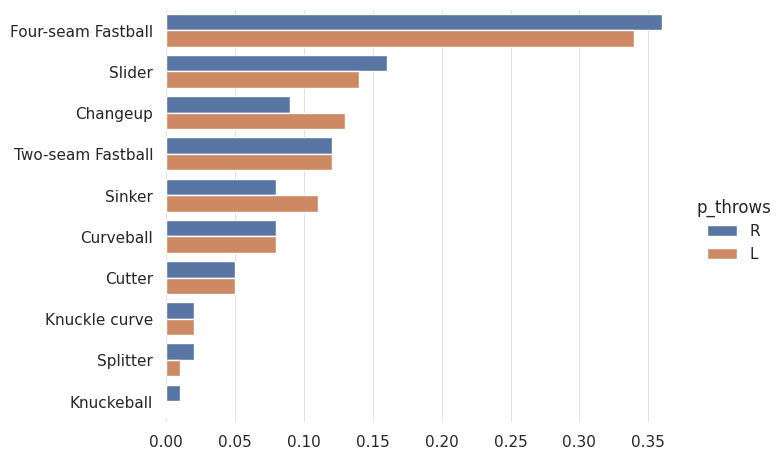

In [18]:
g = sns.catplot(PITCH_TYPE_HAND_NARROW.sort_values('p', ascending=False), x= 'p', y='pitch_desc', hue='p_throws', kind='bar', aspect=1.5)
sns.despine(left=True, bottom=True)
plt.grid(axis='x', color='lightgray', lw=.5)
plt.xlabel('')
plt.ylabel('')
plt.show()

## Scatter plot

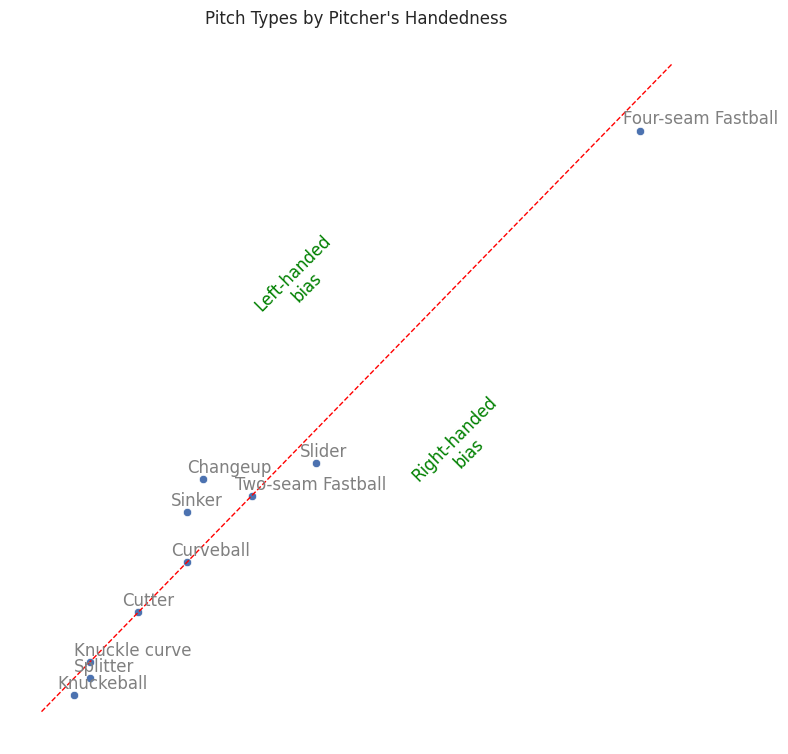

In [19]:
g = sns.relplot(PITCH_TYPE_HAND, x='R', y='L', kind='scatter', height=8)

# Create a diagonal 
g.ax.plot([-.01,.38], [-.01,.38], ls='--', color='red', lw=1)
# g.ax.set_ylim(-.01,.38)
# g.ax.set_xlim(-.01,.38)

# Label the points
for idx, row in PITCH_TYPE_HAND.iterrows():
    g.ax.annotate(idx, xy=(row.R, row.L), xytext=(row.R - .01, row.L + .004), c='gray', rotation=0)

# Reduce ink
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True)

# Add labels
plt.text(.15, .25, 'Left-handed\nbias', color='green', ha='center', va='center', rotation=45)
plt.text(.25, .15, 'Right-handed\nbias', color='green', ha='center', va='center', rotation=45)

plt.title(shared_chart_title)
plt.show()

## Butterfly Chart

In [20]:
X = PITCH_TYPE_HAND

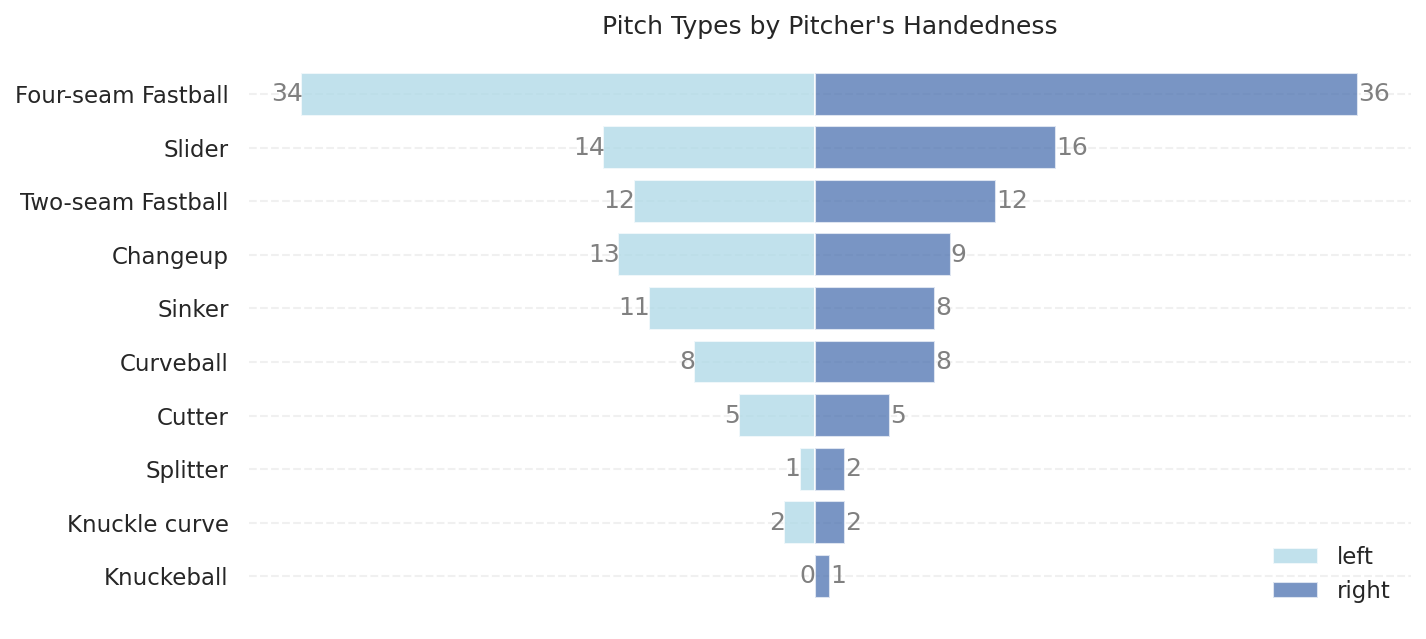

In [21]:
# Define figure parameters
fig = plt.figure(figsize=(10, len(X)/2), dpi=150)

# Create an axes to draw on
ax = plt.subplot()

# Note you can do both at once ...
# fig, ax = plt.subplots(figsize=(10, len(X)/2), dpi=150)

# Plot the bars, flipping the left with negation
ax.barh(y=X.index, width=-X.L, alpha=.75, color='lightblue', label="left")
ax.barh(y=X.index, width=X.R, alpha=.75, label="right")

# Create individual bar text labels
text_props = {'c': 'gray', 'va': 'center'}
for y in X.index:
    x1 = X.loc[y].L
    x2 = X.loc[y].R
    x1_label = str(round(x1 * 100))
    x2_label = str(round(x2 * 100))
    ax.text(-(x1 + .01 * len(x1_label)), y, x1_label, **text_props)
    ax.text(+x2, y, x2_label, **text_props)

plt.legend(frameon=False, loc="lower right")

# Reduce ink
sns.despine(left=True, bottom=True)
ax.set_xticks([])
ax.grid(axis='y', color='#F0F0F0', ls='--')

plt.title(shared_chart_title)
plt.show()

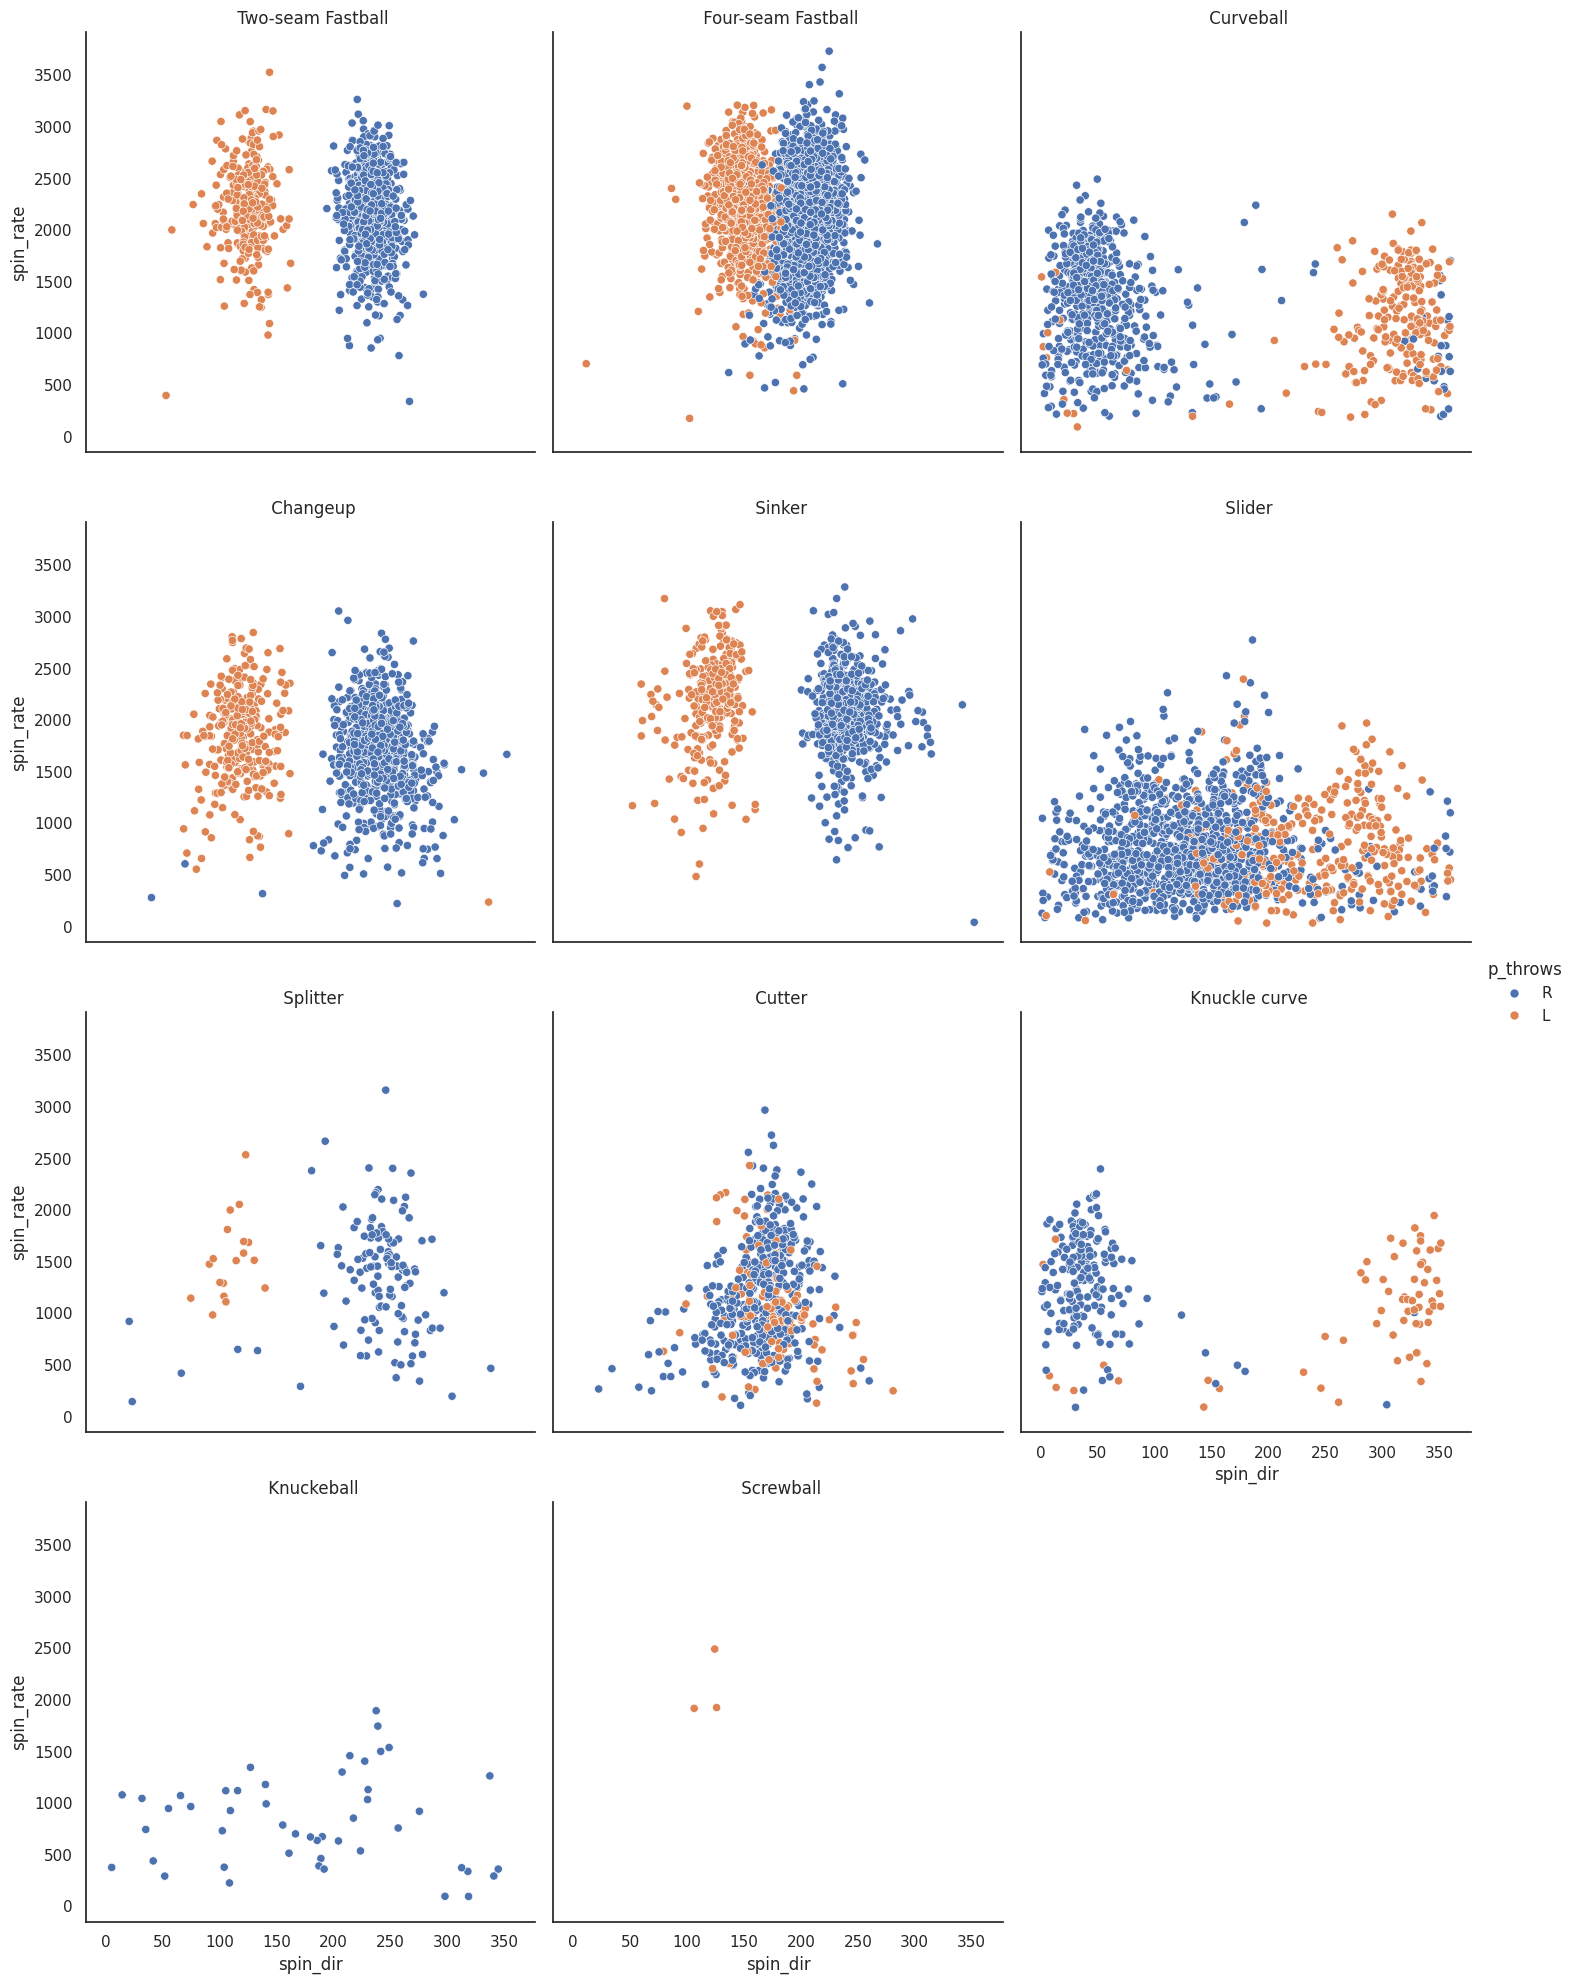

In [22]:
g = sns.relplot(ALL[ALL.include == 1].sample(10000), y='spin_rate', x='spin_dir', kind='scatter', col='pitch_desc', col_wrap=3, hue='p_throws')
for i, ax in enumerate(g.axes):
    ax.set_title(ax.get_title().split('=')[1])
plt.show()

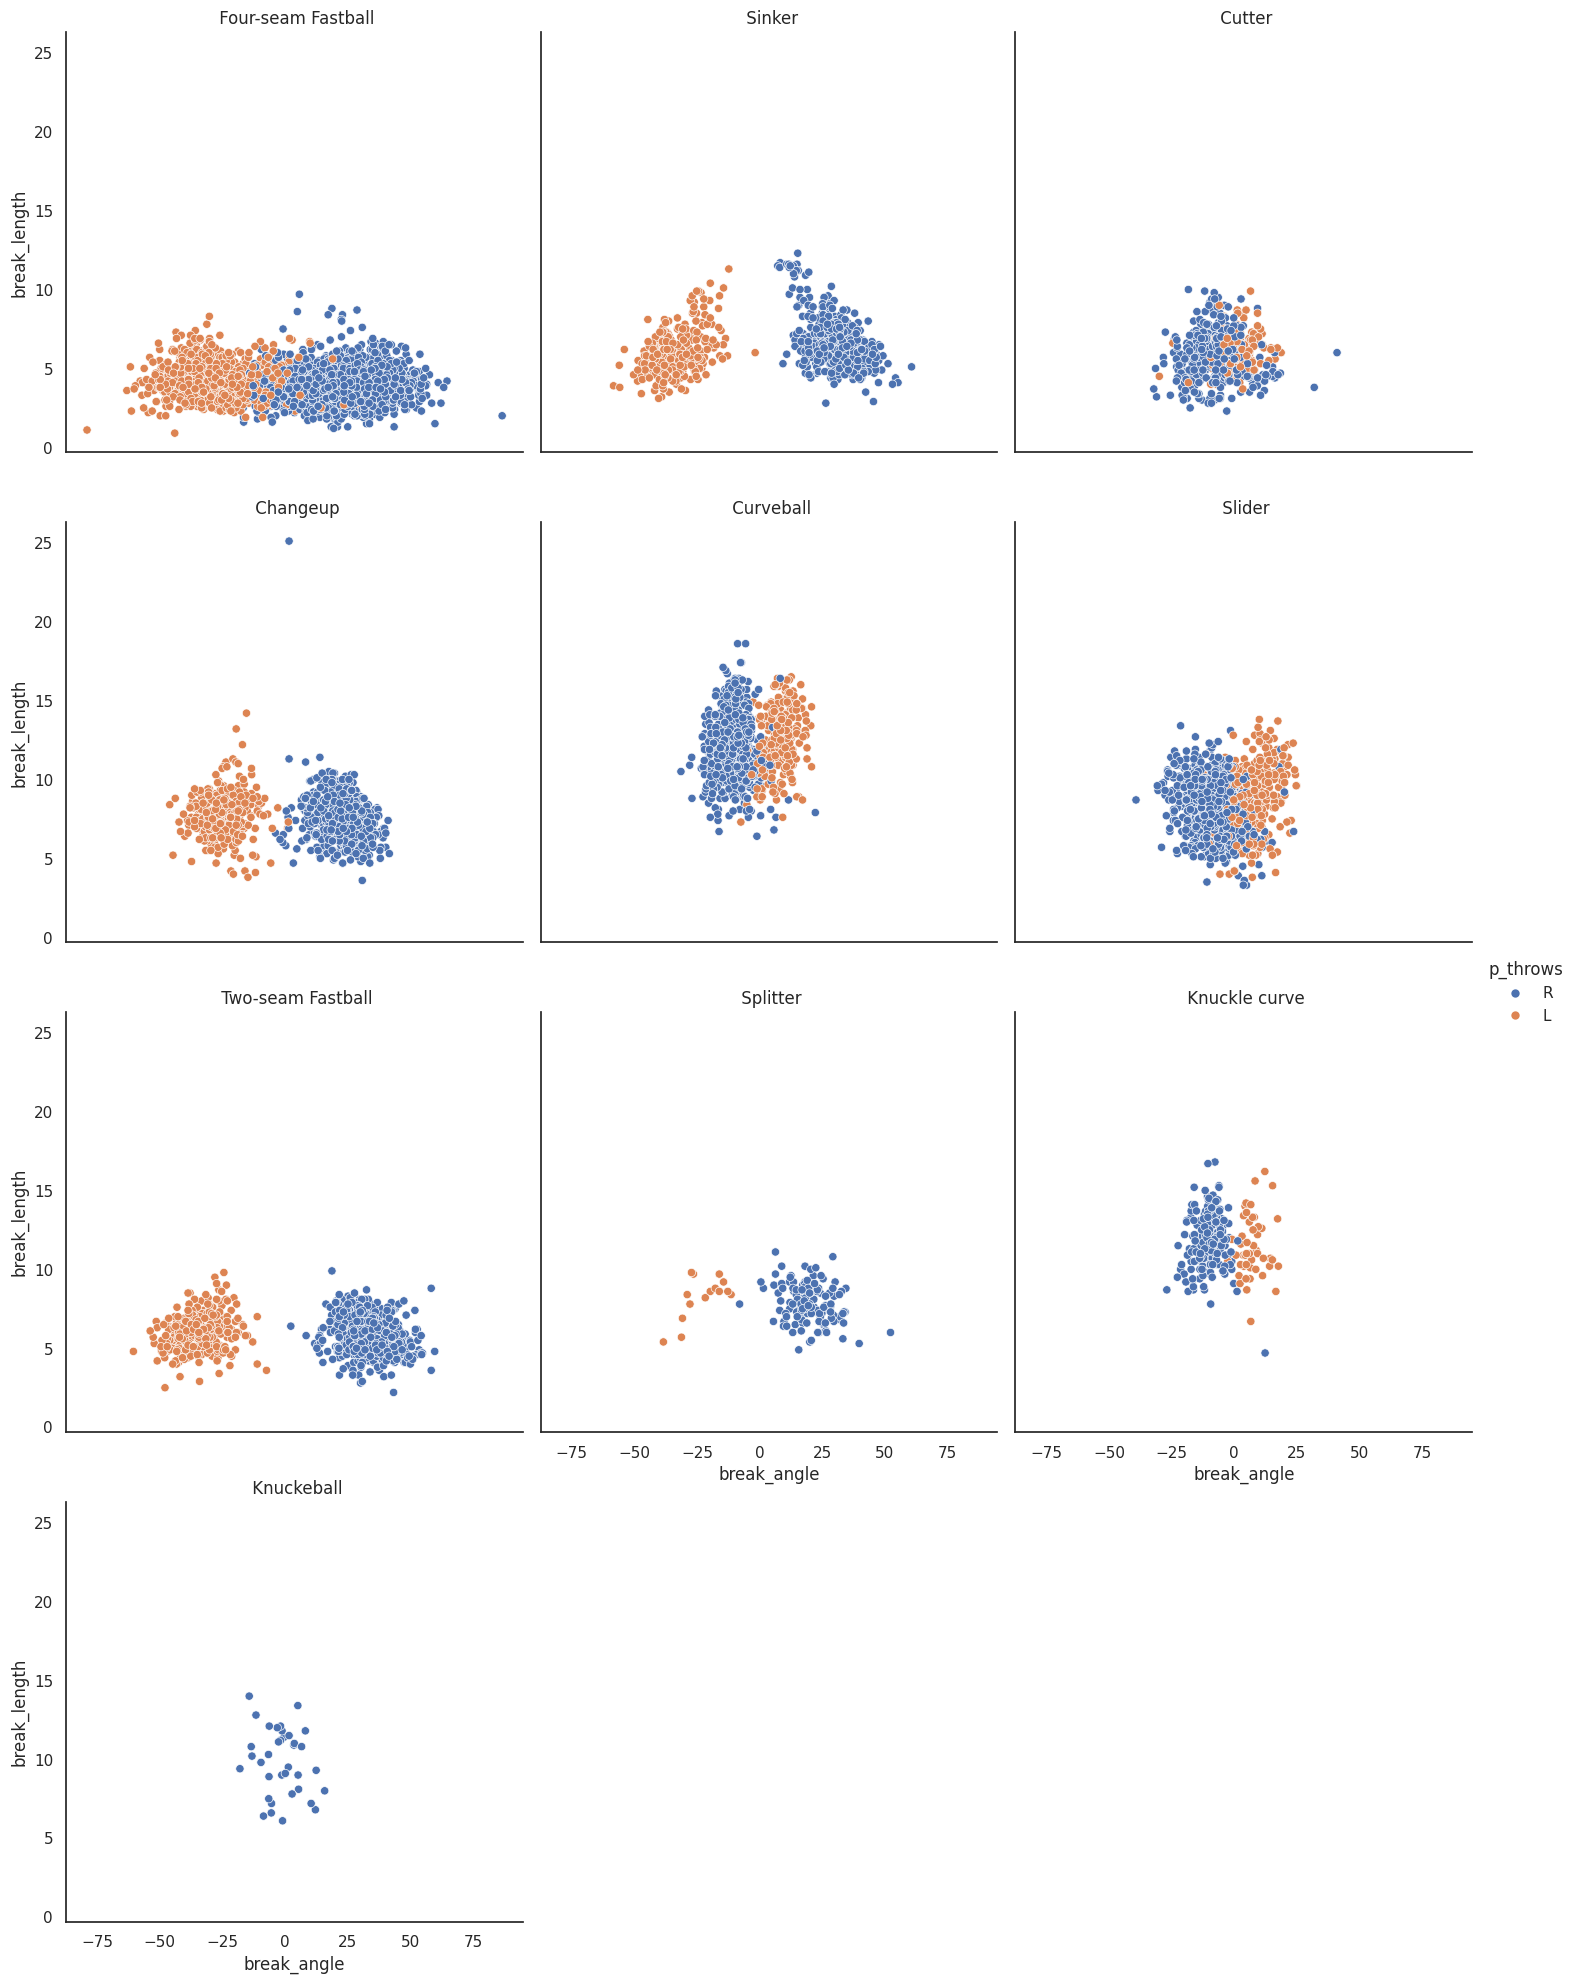

In [23]:
g = sns.relplot(ALL[ALL.include == 1].sample(10000), x='break_angle', y='break_length', kind='scatter', col='pitch_desc', col_wrap=3, hue='p_throws')
for i, ax in enumerate(g.axes):
    ax.set_title(ax.get_title().split('=')[1])
plt.show()